In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/tanishq21/Mall-Customers/refs/heads/main/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Genre', ylabel='Count'>

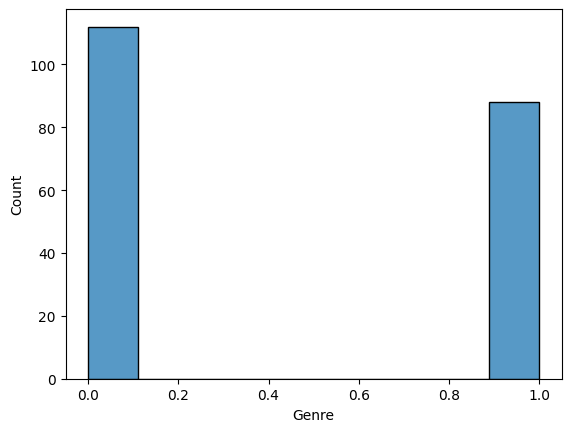

In [22]:
sns.histplot(df.Genre)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)

In [10]:
from sklearn.cluster import KMeans

In [16]:
!pip install kneed

In [17]:
from kneed import KneeLocator

In [21]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [23]:
sc=StandardScaler()

In [20]:
for cols in df.columns:
    le=LabelEncoder()
    if df[cols].dtype=='O':
        df[cols]=le.fit_transform(df[cols])

In [24]:
x_pca=sc.fit_transform(df)

In [25]:
x_pca = pca.fit_transform(x_pca)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


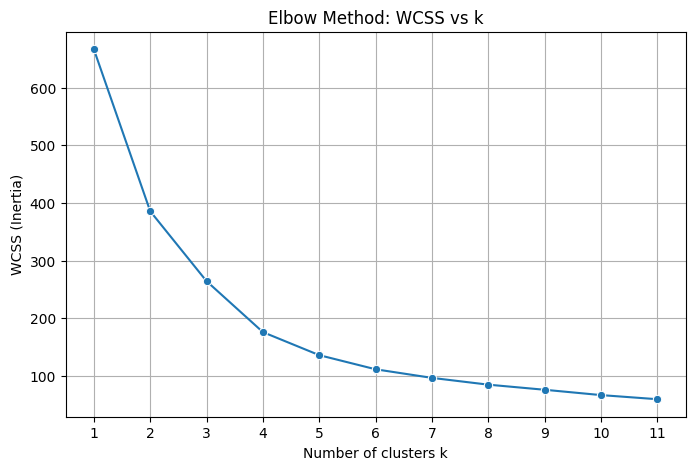

In [26]:
wcss = []
K_range = range(1, 12)  # 1..11
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(x_pca)
    wcss.append(km.inertia_)

# Plot elbow (WCSS vs k)
plt.figure(figsize=(8,5))
sns.lineplot(x=list(K_range), y=wcss, marker='o')
plt.xticks(list(K_range))
plt.xlabel('Number of clusters k')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method: WCSS vs k')
plt.grid(True)
plt.show()

In [28]:
from sklearn.metrics import silhouette_score

In [29]:

k_values = list(range(2, 12))
inertias_for_k = [wcss[k-1] for k in k_values]  # wcss list indexed from k=1 at pos0

knee = KneeLocator(k_values, inertias_for_k, curve='convex', direction='decreasing')
k_opt = knee.knee
print(f'Kneedle found knee at k = {k_opt}')

if k_opt is None:
    diffs = np.diff(inertias_for_k)
    second_diffs = np.diff(diffs)
    idx = np.argmax(-second_diffs)  
    k_opt = k_values[idx+1]  
    print(f'Fallback heuristic selected k = {k_opt}')

if k_opt is not None and k_opt >= 2:
    km_opt = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
    labels_opt = km_opt.fit_predict(x_pca)
    sil_opt = silhouette_score(x_pca, labels_opt)
    print(f'Silhouette score for k={k_opt}: {sil_opt:.4f}')
else:
    print('No valid optimal k found by kneed or fallback; skipping silhouette for optimal k')

Kneedle found knee at k = 5
Silhouette score for k=5: 0.4046


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


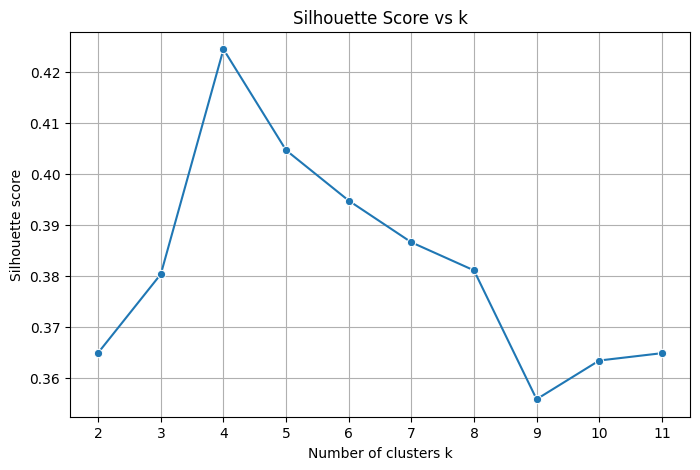

k -> silhouette score
2 -> 0.3650070275471937
3 -> 0.38039664396316736
4 -> 0.4244259233653287
5 -> 0.4046491782870544
6 -> 0.39478473990797824
7 -> 0.3866254429876699
8 -> 0.38112965211338773
9 -> 0.35590659437766076
10 -> 0.3634830405747389
11 -> 0.3649204011810781


In [30]:
sil_scores = {}
for k in range(2, 12):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(x_pca)
    try:
        s = silhouette_score(x_pca, labels)
    except Exception as e:
        s = np.nan
    sil_scores[k] = s

# Plot silhouette scores
plt.figure(figsize=(8,5))
ks = list(sil_scores.keys())
vals = [sil_scores[k] for k in ks]
sns.lineplot(x=ks, y=vals, marker='o')
plt.xticks(ks)
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score vs k')
plt.grid(True)
plt.show()

# Print table of silhouette scores
print('k -> silhouette score')
for k, s in sil_scores.items():
    print(f'{k} -> {s}')

In [32]:
km = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = km.fit_predict(x_pca)

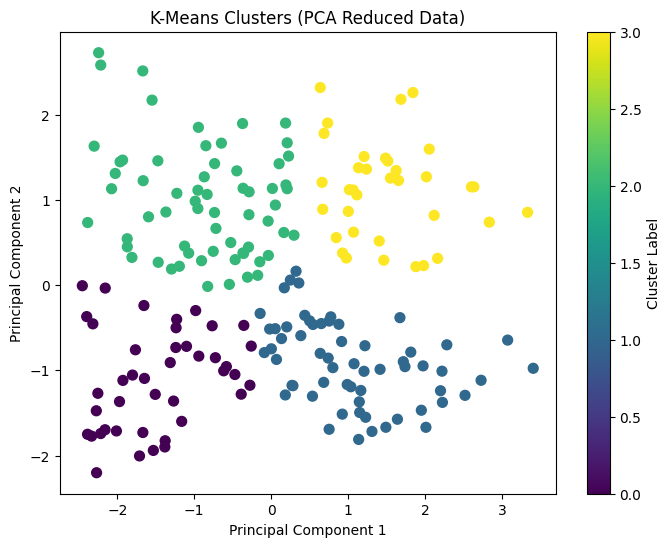

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap='viridis', s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters (PCA Reduced Data)")
plt.colorbar(label="Cluster Label")
plt.show()


In [34]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
hc_labels = hc.fit_predict(x_pca)


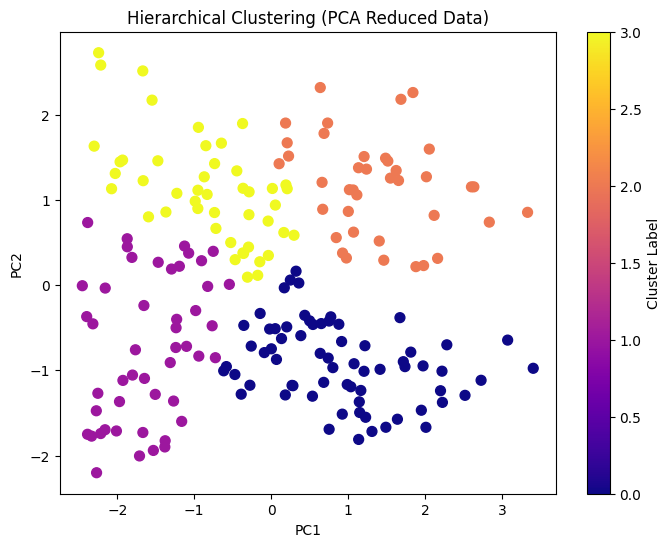

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=hc_labels, cmap='plasma', s=50)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Hierarchical Clustering (PCA Reduced Data)")
plt.colorbar(label="Cluster Label")
plt.show()


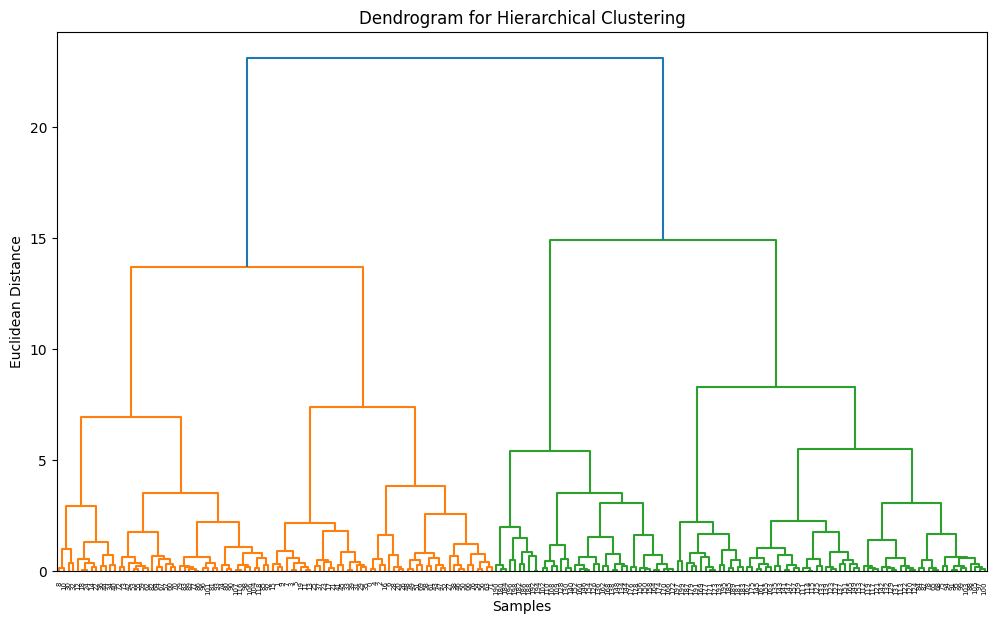

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(12,7))
linked = linkage(x_pca, method='ward')

dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()


### 1. The number of clusters in a hierarchical cluster is determined by the longest vertical line which doesn't intersect with any merging horizontal line

### 2. Hierarchical Clustering gives more explainable and interpretable clusters because the dendrogram visually reveals how data forms groups at every level, and helps you choose the right number of clusters logically.